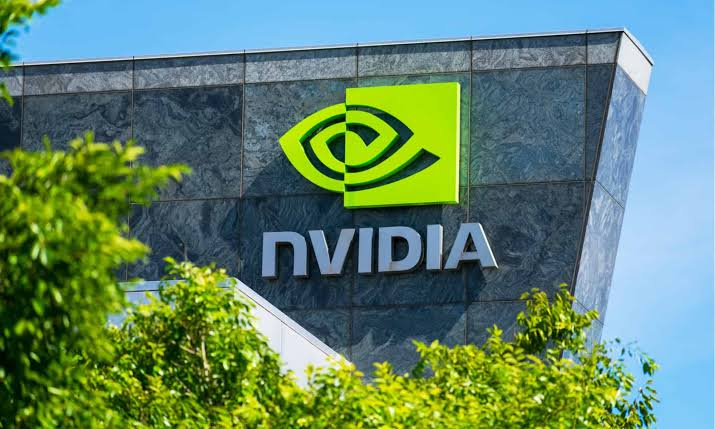

In [1]:
import numpy as np
import pandas as pd
#import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("NVDA.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,12 June 2017,36.470001,37.924999,35.527500,37.492500,37.076328,169753200
1,13 June 2017,38.599998,38.692501,36.412498,37.849998,37.429855,167250400
2,14 June 2017,37.880001,38.514999,37.125000,37.930000,37.508972,118464000
3,15 June 2017,36.740002,38.400002,36.625000,38.092499,37.669662,96382400
4,16 June 2017,38.189999,38.674999,37.560001,37.904999,37.484249,92496000


In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
print(df.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [6]:
df['Month'] = df['Date'].apply(lambda x: x.split(' ')[1])
df['NMonth'] = pd.to_datetime(df['Date'], format='%d %B %Y').dt.month
df['Year'] = pd.to_datetime(df['Date'], format='%d %B %Y').dt.year

In [7]:
decimal = lambda x: '{:.2f}'.format(x)

df['High'] = df['High'].apply(decimal)
df['Low'] = df['Low'].apply(decimal)
df['Open'] = df['Open'].apply(decimal)
df['Close'] = df['Close'].apply(decimal)
df['Adj Close'] = df['Adj Close'].apply(decimal)


In [8]:
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)
df['Open'] = df['Open'].astype(float)
df['Close'] = df['Close'].astype(float)
df['Adj Close'] = df['Adj Close'].astype(float)


In [9]:
def month_to_num(month):
    return {
        'January':1,
        'February':2,
        'March':3,
        'April':4,
        'May':5,
        'June':6,
        'July':7,
        'August':8,
        'September':9,
        'October':10,
        'November':11,
        'December':12
    }[month]

df['Month'].apply(month_to_num)

0       6
1       6
2       6
3       6
4       6
       ..
1255    6
1256    6
1257    6
1258    6
1259    6
Name: Month, Length: 1260, dtype: int64

In [10]:
df['Month'] = df['Month'].apply(lambda x: x[:3])

In [11]:
print(df.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
Month         object
NMonth         int64
Year           int64
dtype: object


In [12]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,NMonth,Year
0,12 June 2017,36.47,37.92,35.53,37.49,37.08,169753200,Jun,6,2017
1,13 June 2017,38.60,38.69,36.41,37.85,37.43,167250400,Jun,6,2017
2,14 June 2017,37.88,38.51,37.12,37.93,37.51,118464000,Jun,6,2017
3,15 June 2017,36.74,38.40,36.62,38.09,37.67,96382400,Jun,6,2017
4,16 June 2017,38.19,38.67,37.56,37.90,37.48,92496000,Jun,6,2017


<IPython.core.display.Javascript object>


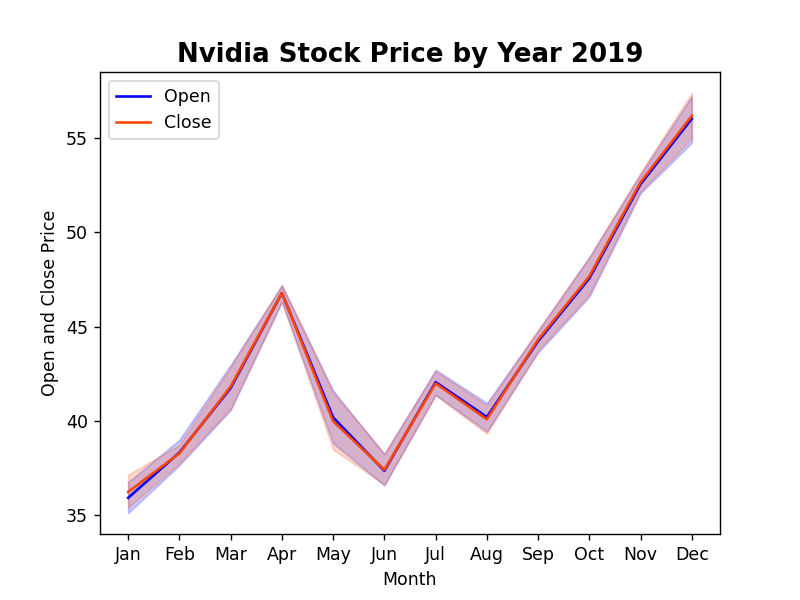

In [13]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import time

fig, ax = plt.subplots()
def updates(year):
    data = df[df['Year'] == year].copy()
    ax.clear()
    ax.set_title(f"Nvidia Stock Price by Year {year}", color='black', fontweight='bold', fontsize=15)
    
    sns.lineplot('Month', 'Open', data=data, color='blue', label='Open')
    sns.lineplot('Month', 'Close', data=data, color='orangered', label='Close')
    
    ax.legend()
    ax.set_ylabel('Open and Close Price', fontsize=10)

ani = FuncAnimation(fig, updates, interval=1000, frames=np.arange(2017, 2023))
plt.show()

<IPython.core.display.Javascript object>


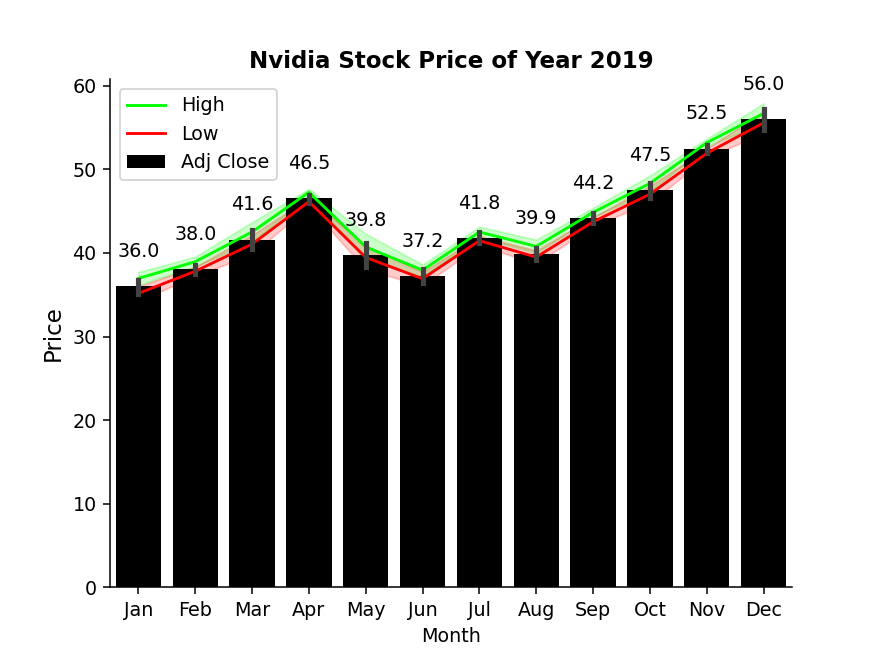

In [14]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import time


fig, ax = plt.subplots(dpi=110)
def update(frame):
    temp = df[df["Year"] == frame].copy()
    ax.clear()
    ax.set_title(f"Nvidia Stock Price of Year {frame}", color="black", fontsize=12, fontweight='bold')
    
    
    sns.lineplot('Month', 'High', data=temp, color='lime', label='High')
    sns.lineplot('Month', 'Low', data=temp, color='red', label='Low')
    bar = sns.barplot('Month', 'Adj Close', data=temp, color='black', label='Adj Close')
    
    for p in bar.patches:
        bar.text(p.get_x() + p.get_width()/2, p.get_height()+3.5, '%.1f' % p.get_height(), ha='center')
        
    #figure_variable = plt.gcf()    
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.legend()
    ax.set_ylabel('Price', fontsize=12)



ani = FuncAnimation(fig, update, interval=1000, frames= np.arange(2017, 2023))
plt.show()

In [15]:
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%d %B %Y')
monthly_volume_df = pd.DataFrame(columns=['Year', 'Month', 'Volume'])

for year in range(2017, 2023):
    year_df = df[df['Date'].str.contains(str(year))]
    monthly_volume = year_df.groupby(year_df['Date'].str[3:9])['Volume'].sum()
    
    for month, volume in monthly_volume.iteritems():
        monthly_volume_df = monthly_volume_df.append({'Year': year, 'Month': month, 'Volume': volume}, ignore_index=True)

In [16]:
monthly_volume_df['Month'] = monthly_volume_df['Month'].apply(lambda x: x[:3])
monthly_volume_df.head()

,Year,Month,Volume
0,2017,Aug,1472821600
1,2017,Dec,1011221600
2,2017,Jul,1549101600
3,2017,Jun,1541133600
4,2017,Nov,1183089600


In [17]:
def month(mnt):
    return {
        'Jan':1,
        'Feb':2,
        'Mar':3,
        'Apr':4,
        'May':5,
        'Jun':6,
        'Jul':7,
        'Aug':8,
        'Sep':9,
        'Oct':10,
        'Nov':11,
        'Dec':12
    }[mnt]

monthly_volume_df['Nmonth'] = monthly_volume_df['Month'].apply(month)
monthly_volume_df = monthly_volume_df.sort_values(by=['Nmonth'])


<IPython.core.display.Javascript object>


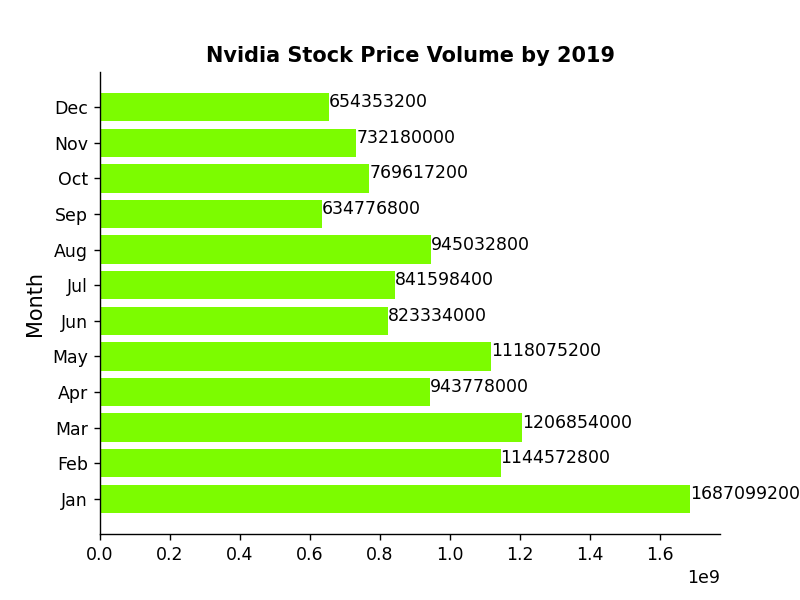

In [18]:
%matplotlib notebook
import time
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

def updte(yer):
    dta = monthly_volume_df[monthly_volume_df['Year'] == yer]
    ax.clear()
    ax.set_title(f"Nvidia Stock Price Volume by {yer}", fontsize=12, fontweight='bold', color='black')
    
    ax.barh(y='Month', width='Volume', data=dta, color='lawngreen')
    
    for i, v in enumerate(dta['Volume']):
        ax.text(v + 0.2, i, str(v), color='black', fontsize=10)
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_ylabel('Month', fontsize=12)
    #ax.set_xlabel('Volume', fonsize=12)
    
ani = FuncAnimation(fig, updte, interval=1000, frames=np.arange(2017, 2023))
plt.show()

for year in range(2017, 2023):
    total = df[df['Year'] == year]
    monthly_totals = total.groupby('Month')['Volume'].sum()
    years = total.groupby('Year')['Volume'].sum()
    
    print(f"{year} {monthly_totals}\n")